<h1 class="alert alert-info"><center>Activité : cryptographie asymétrique</center></h1>

Le but de cette activité est de manipuler un exemple classique de cryptographie asymétrique : le **chiffrement RSA**.

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/10-11/20-40-36/Crypto_asym.png' style='width:60%;height:auto;'>
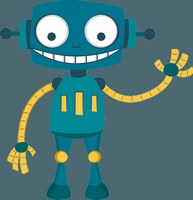

Pour renforcer la sécurité de leurs communications, Alice et Guillaume décident d'utiliser une méthode chiffrement asymétrique : le **chiffrement RSA** (du nom de leurs inventeurs Rivest, Shamir et Adleman).

Le principe de ce chiffrement repose sur des outils mathématiques très puissants. Son protocole de construction est le suivant :
 - choisir deux nombres premiers $p$ et $q$ distincts ;
 - calculer $n=pq$ et $m=(p-1)(q-1)$ ;
 - choisir un entier naturel $d$ premier avec $m$ (c'est-à-dire sans facteur premier commun) ;
 - calculer l'entier naturel $e$ tel que le reste de la division euclidienne de $de$ par $m$ soit égal à $1$ ;
 - détruire $m$, $p$ et $q$ ; publier $n$ et $d$ ; garder $e$ secret.
 
Soit alors $M$ un message donné sous la forme d'un nombre entier compris entre $0$ et $n-1$.
 - Pour chiffrer $M$, on détermine le reste $M_c$ de la division euclidienne de $M^d$ par $n$.
 - Pour déchiffrer le message $M_c$ et retrouver le message initial $M$, on calcule le reste de la division euclidienne de $M_c^e$ par $n$.

<h2 class="alert alert-info">Exercice 1 : questions générales</h2>

1. Dans le chiffrement RSA, qui sont les clés publique et privée ?
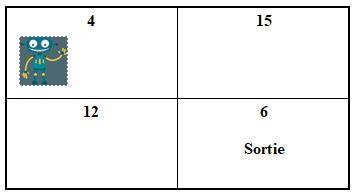

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

2. Lors de l'attaque du chiffrement RSA utilisé par Alice et Guillaume, que doit déterminer Charles ?

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

3. Dans les situations suivantes, Charles peut-il casser le système de chiffrement ?
 - $n=187$
 - $n=22733$
 - $n=8767457$
 - $n=4338219660050123$

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

**Remarque :** dans le chiffrement RSA, le problème difficile à résoudre est la factorisation d'un entier en produit de nombres premiers (y compris lorsque l'on sait à l'avance que c'est un produit de deux nombres premiers). Ainsi, la recherche de grands nombres premiers non encore connus est un problème actuel très porteur, de même que son problème inverse : la factorisation. Une compétition de factorisation de nombres RSA (c'est-à-dire produits de deux nombres premiers) a d'ailleurs été organisée en ce sens par la société RSA Security entre 1991 et 2007. Aujourd'hui, plusieurs nombres RSA n'ont toujours pas été factorisés (voir la liste <a href='https://fr.wikipedia.org/wiki/Nombre_RSA'>ici</a>), le dernier, composé de 250 chiffres décimaux (soit 829 bits) l'ayant été en février 2020.

<h2 class="alert alert-info">Exercice 2 : implémentation</h2>

Alice et Guillaume décident d'utiliser l'alphabet constitué des vingt-six lettres majuscules. A chacun de ces caractères, ils associent également un nombre entier suivant le tableau ci-dessous :

<table>
	<tr>
		<th style='text-align:left;background-color:#DCDCDC;border:1px solid black;'>Lettre</th>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>A</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>B</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>C</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>D</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>E</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>F</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>G</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>H</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>I</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>J</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>K</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>L</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>M</code></td>
	</tr>
	<tr>
		<th style='text-align:left;background-color:#DCDCDC;border:1px solid black;'>Valeur</th>
		<td style='text-align:center;background-color:white;border:1px solid black;'>0</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>1</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>2</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>3</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>4</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>5</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>6</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>7</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>8</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>9</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>10</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>11</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>12</td>
	</tr>
	<tr><td style='text-align:center;background-color:white;'></td></tr>
	<tr>
		<th style='text-align:left;background-color:#DCDCDC;border:1px solid black;'>Lettre</th>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>N</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>O</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>P</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>Q</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>R</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>S</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>T</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>U</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>V</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>W</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>X</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>Y</code></td>
		<td style='text-align:center;background-color:white;border:1px solid black;'><code style='background-color:white;'>Z</code></td>
	</tr>
	<tr>
		<th style='text-align:left;background-color:#DCDCDC;border:1px solid black;'>Valeur</th>
		<td style='text-align:center;background-color:white;border:1px solid black;'>13</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>14</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>15</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>16</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>17</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>18</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>19</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>20</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>21</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>22</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>23</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>24</td>
		<td style='text-align:center;background-color:white;border:1px solid black;'>25</td>
	</tr>
</table>

Les lettres utilisées par Alice et Guillaume sont stockées dans la variable `alphabet` ci-dessous :
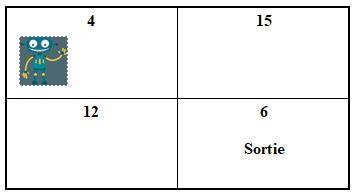

In [ ]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

1. Ecrire ci-dessous une instruction permettant d'affecter à la variable `correspondance` un dictionnaire ayant pour clés les caractères de l'alphabet et pour valeurs les valeurs numériques associées.

In [ ]:
# Ecrire l'instruction ici

2. Ecrire ci-dessous une instruction permettant d'affecter à la variable `correspondance_inverse` un dictionnaire ayant pour clés les nombres entiers de $0$ à $25$ et pour valeurs les caractères de l'alphabet correspondants.

In [ ]:
# Ecrire l'instruction ici

3. On considère les deux fonctions Python suivantes :

In [ ]:
def texte_vers_nombre(texte):
    code_texte = [correspondance[texte[i]] for i in range(len(texte))]
    val_texte = 0
    for i in range(len(code_texte)):
        val_texte += code_texte[i]*26**i
    return val_texte

def nombre_vers_texte(nb):
    code_texte = []
    while nb != 0:
        code_texte.append(nb%26)
        nb //= 26
    return ''.join([correspondance_inverse[code_texte[i]] for i in range(len(code_texte))])

 - Expliquer la fonction `texte_vers_nombre`. Que renvoie-t-elle ?

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

 - Même question avec la fonction `nombre_vers_texte`.

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

4. Pour son chiffrement RSA, Guillaume choisit les nombres premiers $p=2953$ et $q=2969$. Il calcule ensuite $n=8767457$ et $m=8761536=2^6\times3^2\times7\times41\times53$. Il choisit alors comme clé publique $d=825163=17\times48539$ et détermine sa clé privée $e=826915$.

 - Alice veut envoyer le message `CODE` à Guillaume. Ecrire ci-dessous les instructions qu'elle doit saisir pour obtenir le message chiffré qu'elle doit envoyer. Quel est ce message ?

In [ ]:
# Ecrire les instructions ici

 - A réception du message d'Alice, quelles instructions doit saisir Guillaume pour le déchiffrer ?

In [ ]:
# Ecrire les instructions ici

5. Compléter la fonction suivante permettant de réaliser le chiffrement/déchiffrement d'un message suivant la méthode RSA.

In [ ]:
def rsa(texte, val, clé):
    '''
    texte est une chaîne de caractère à chiffrer/déchiffrer
    val est la valeur de n
    clé est la valeur de d ou e
    '''
    valeur_texte = ...
    valeur_texte_clé = ...
    return ...

Les deux cellules ci-dessous permettent de tester votre code. Elles doivent renvoyer `True` lors de leur exécution.

In [ ]:
rsa('CODE', 8767457, 825163) == 'EKQOK'

In [ ]:
rsa('EKQOK', 8767457, 826915) == 'CODE'

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Ce document  est mis à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licence Creative Commons Attribution -  Partage dans les Mêmes Conditions 4.0 International</a>.
Pour toute question : <a href="mailto:charles.poulmaire@ac-versailles.fr">charles.poulmaire@ac-versailles.fr</a> ou <a href="mailto:pascal.remy@ac-versailles.fr">pascal.remy@ac-versailles.fr</a>